# SU2 Rotation

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `SU2RotationGate`
Implements an arbitrary SU(2) rotation.

The rotation is represented by the matrix:

$$
    e^{i \alpha}
    \begin{pmatrix}
    e^{i(\lambda + \phi)} \cos(\theta) & e^{i\phi} \sin(\theta) \\
    e^{i\lambda} \sin(\theta) & - \cos(\theta)
    \end{pmatrix}
$$

#### Parameters
 - `theta`: rotation angle $\theta$ in the above matrix.
 - `phi`: phase angle $\phi$ in the above matrix.
 - `lambd`: phase angle $\lambda$ in the above matrix.
 - `global_shift`: phase angle $\alpha$, i.e. apply a global phase shift of $e^{i \alpha}$. 

#### References
 - [Generalized Quantum Signal Processing](https://arxiv.org/abs/2308.01501). Motlagh and Wiebe. (2023). Equation 7.


In [2]:
from qualtran.bloqs.basic_gates import SU2RotationGate

### Example Instances

In [3]:
su2_rotation_gate = SU2RotationGate(np.pi / 4, np.pi / 2, np.pi / 2)

In [4]:
hadamard = SU2RotationGate(np.pi / 4, 0, 0)

In [5]:
t_gate = SU2RotationGate(0, 3 * np.pi / 4, 0, -3 * np.pi / 4)

#### Graphical Signature

In [6]:
from qualtran.drawing import show_bloqs
show_bloqs([su2_rotation_gate, hadamard, t_gate],
           ['`su2_rotation_gate`', '`hadamard`', '`t_gate`'])

### Call Graph

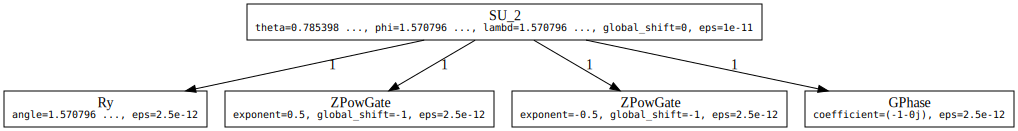

#### Counts totals:
 - `(-1-0j)`: 1
 - `Ry(0.5π)`: 1
 - `ZPowGate(exponent=-0.5, global_shift=-1)`: 1
 - `ZPowGate(exponent=0.5, global_shift=-1)`: 1

In [7]:
from qualtran.resource_counting.generalizers import ignore_split_join
su2_rotation_gate_g, su2_rotation_gate_sigma = su2_rotation_gate.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(su2_rotation_gate_g)
show_counts_sigma(su2_rotation_gate_sigma)